### raw data: tweeter, instagram 등 SNS에서 데이터 수집 후 데이터 전처리

### 광고 제거 ( 자체 광고 및 불법 광고)

# Model Description

## tf-idf : 단어 빈도와 역문서 빈도의 곱

$$\text{tf}(t,d) = 0.5 + {0.5 \times \text{f}(t,d) \over \max \{ \text{f}(w,d) : w \in d \}}$$

$$\text{idf}(t,D) = log {\left| D \right| \over |\{d \in D : t \in d\}|}$$

$$\text{tfidf}(t,d,D) = \text{tf}(t,d) \times \text{idf}(t,D)$$

## logistic regression: 각 단어에 확률 부여

$$ \text{odds} = {p(y = 1\ |\ X) \over 1 - p(y = 1\ |\ X)} $$

$$ \text{logit}(p) = log{p \over 1-p} $$

$$ \text{logistic function} = {e^{\beta \cdot X_i} \over 1 + e^{\beta \cdot X_i}} $$

Importing Model
=============

In [1]:
# 만들어진 모델을 불러오는데 필요한 코드
import pickle
import os
from konlpy.tag import Twitter
twit = Twitter()
def tokenizer(text):
    return twit.morphs(text)

curDir = os.getcwd() # curDir = 현재 경로 / 폴더명1 / 폴더명 2 / 파일명.pkl
model = pickle.load(open(os.path.join(curDir,'mixed_model.pkl'),'rb')) # call model
tfidf = pickle.load(open(os.path.join(curDir,'tfidf.pkl'),'rb')) # call vectorizer

Read Data_Set
=============

In [2]:
import pandas as pd 

# hanhwa_test
df_1 = pd.read_csv(r'hanhwa_app_1.txt',
                   delimiter='\t',keep_default_na=False)
h_y = df_1['label'].as_matrix()
h_x = df_1['comments'].as_matrix()

input_test = tfidf.transform(h_x)
result = model.predict(input_test)
result_p = model.predict_proba(input_test)

Output Data
=============

In [3]:
df_prob = pd.DataFrame(result_p)
result_p0 = df_prob[0]
result_p1 = df_prob[1]
point = round((result_p1 - result_p0),2)*100

data = {'contents':h_x,
       'predict_label':result,
       'real_label':h_y,
       'point':point}
data_pandas = pd.DataFrame(data)
from IPython.display import display
display(data_pandas)

,contents,point,predict_label,real_label
0,타 앱 대비 Ux측면의 부족함은 주관적측면이 있기 때문에 논외로 한다고 쳐도... ...,-16.0,0,0
1,"수준이 낮다, 업그레이드 무시하면 진행이 안되고, 업그레이드 시키면 하루종일 화면구...",-97.0,0,0
2,"개발자 능력이 없거나, 앱 개발 조직이 아주 쓰레기이거나 둘 중 하나로 추정되며 이...",-83.0,0,0
3,화면지연은 언제까지 이대로 놔두실예정인지?? 업데이트 다시 해야겠는데요? 사용도 못...,-43.0,0,0
4,안정적인 시스템을 구축할 능력이 없다면 어플 지원하지 마세요...깔았다 지웠다 전원...,-96.0,0,0
5,몇번을 다시 깔아도 화면구성만 하다 꺼지네요. 왕 짜증,-77.0,0,0
6,화면구성 지연이라고 나오고 멈춰버림. 다시 깔아도 안됨. 뭐하자는 거죠?,-98.0,0,0
7,실손청구땜에 하는데 여러장 사진찍고 사이즈조정하다가 멈추어버림 재실행해보면 기존에 ...,-99.0,0,0
8,한화가 왜 일류가 되지 못하는지 이 앱만 봐도 알겠다,-78.0,0,0
9,왜이렇게 안되여ㅜㅜ저금을 할수가 없네요,-74.0,0,0


Composing Data...
=============

In [4]:
# tokeinize - Twitter

from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Twitter
stopwords = ['Josa','PreEomi','Punctuation','Foreign','Alpha','Unknown','Eomi']

def tokenizer2 (doc):
    tagged = ['/'.join(t) for t in twit.pos(doc, norm=True, stem=True)]
    result_words = [word for word in tagged if word.split('/')[-1] == 'Noun']
    result_nouns = [word.split('/')[0] for word in result_words if len(word.split('/')[0]) > 1]
    return result_nouns
 
vect2 = CountVectorizer(tokenizer=tokenizer2,ngram_range=(1,3),min_df=3)

In [5]:
from sklearn.linear_model import LogisticRegression as lgt
from sklearn.feature_extraction.text import TfidfTransformer
clf_1 = lgt(C=10)
tfidf = TfidfTransformer()
h_2 = vect2.fit_transform(h_x)
input_test2 = tfidf.fit_transform(h_2)
feature_names2 = vect2.get_feature_names()
model2 = clf_1.fit(input_test2,result)

Word Power
=============

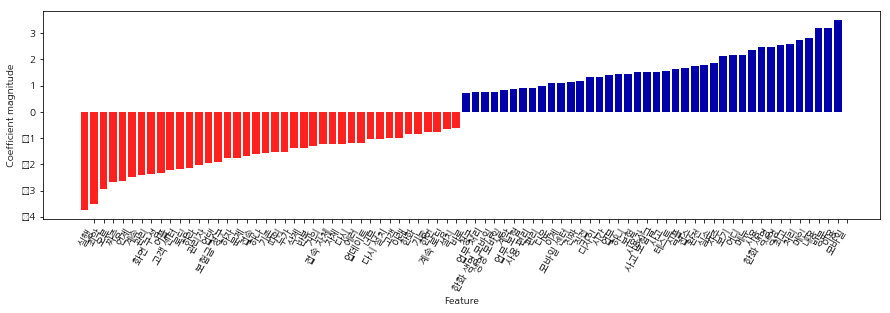

In [6]:
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = r"C:\Windows\Fonts\NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
feature_names = vect2.get_feature_names()

%matplotlib inline
mglearn.tools.visualize_coefficients(
    model2.coef_[0],feature_names,n_top_features=40)

In [7]:
conf = []
for i in range(len(h_x)):
    if abs(point[i]) > 40:
        conf.append([result[i], point[i], h_x[i]])

In [8]:
pos = []
for i in range(len(conf)):
    if conf[i][0]==1:
        pos.append(conf[i][2])
        
neg = []
for i in range(len(conf)):
    if conf[i][0]==0:
        neg.append(conf[i][2])
        
pos_doc = ''.join(pos)
neg_doc = ''.join(neg)
both = [pos_doc, neg_doc]

In [9]:
def tokenizer2 (doc):
    tagged = ['/'.join(t) for t in twit.pos(doc, norm=True, stem=True)]
    result_words = [word for word in tagged if word.split('/')[-1] == 'Noun']
    result_nouns = [word.split('/')[0] for word in result_words if len(word.split('/')[0]) > 1]
    return result_nouns

count_vect = CountVectorizer(tokenizer=tokenizer2)
count_both = count_vect.fit_transform(both)
count_pos = count_vect.transform(pos)
count_neg = count_vect.transform(neg)

In [10]:
tf_transformer = TfidfTransformer().fit(count_both)
tf_both = tf_transformer.transform(count_both)
tf_pos = tf_transformer.transform(count_pos)
tf_neg = tf_transformer.transform(count_neg)

tf_both_array = tf_both.toarray()
sort_index = tf_both_array.argsort(axis=1)

count_dict = count_vect.vocabulary_
for index in sort_index[0][-20:]:
    important_word = index
    key = list(count_dict.keys())[list(count_dict.values()).index(important_word)]

count_dict = count_vect.vocabulary_
for index in sort_index[1][-20:]:
    important_word = index
    key = list(count_dict.keys())[list(count_dict.values()).index(important_word)]

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

for i in range(2,6):
    lda = LatentDirichletAllocation(n_topics=i, learning_method="batch", max_iter=10, random_state=0)
    document_topics = lda.fit_transform(tf_pos)
    print(i, lda.perplexity(tf_pos))

2 804.894057209
3 1825.40846924
4 3989.05107522
5 8680.65632151


Topic Modeling - Positive
=============

In [12]:
# Recommend you to use the number of topics which has minimum value of perplexity

lda_p = LatentDirichletAllocation(n_topics=4, learning_method="batch", max_iter=10, random_state=0)
document_topics_p = lda_p.fit_transform(tf_pos)

import numpy as np

sorting = np.argsort(lda_p.components_, axis=1)[:,::-1]
feature_names = np.array(count_vect.get_feature_names())

import mglearn
mglearn.tools.print_topics(topics=range(4), feature_names=feature_names, sorting=sorting, 
                           topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
화면            보험금           사용            생명            
처리            사고            모바일           최고            
메인            접수            청구            정말            
개편            처리            최고            한화            
모바일           화면            심플            이용            
이용            내용            방문            업무            
저축            업무            너무            너무            
업무            해결            어디            모바일           
창구            업데이트          보기            유용            
활용            아주            편리            메뉴            
가끔            항상            보험금           자주            
용이            하니            업무            메인            
작년            수시            하니            고객            
강제            다운            카드            센터            
지금            다시            라이            접근성           
확인            삭제            조회 

WordCloud - Positive
=============

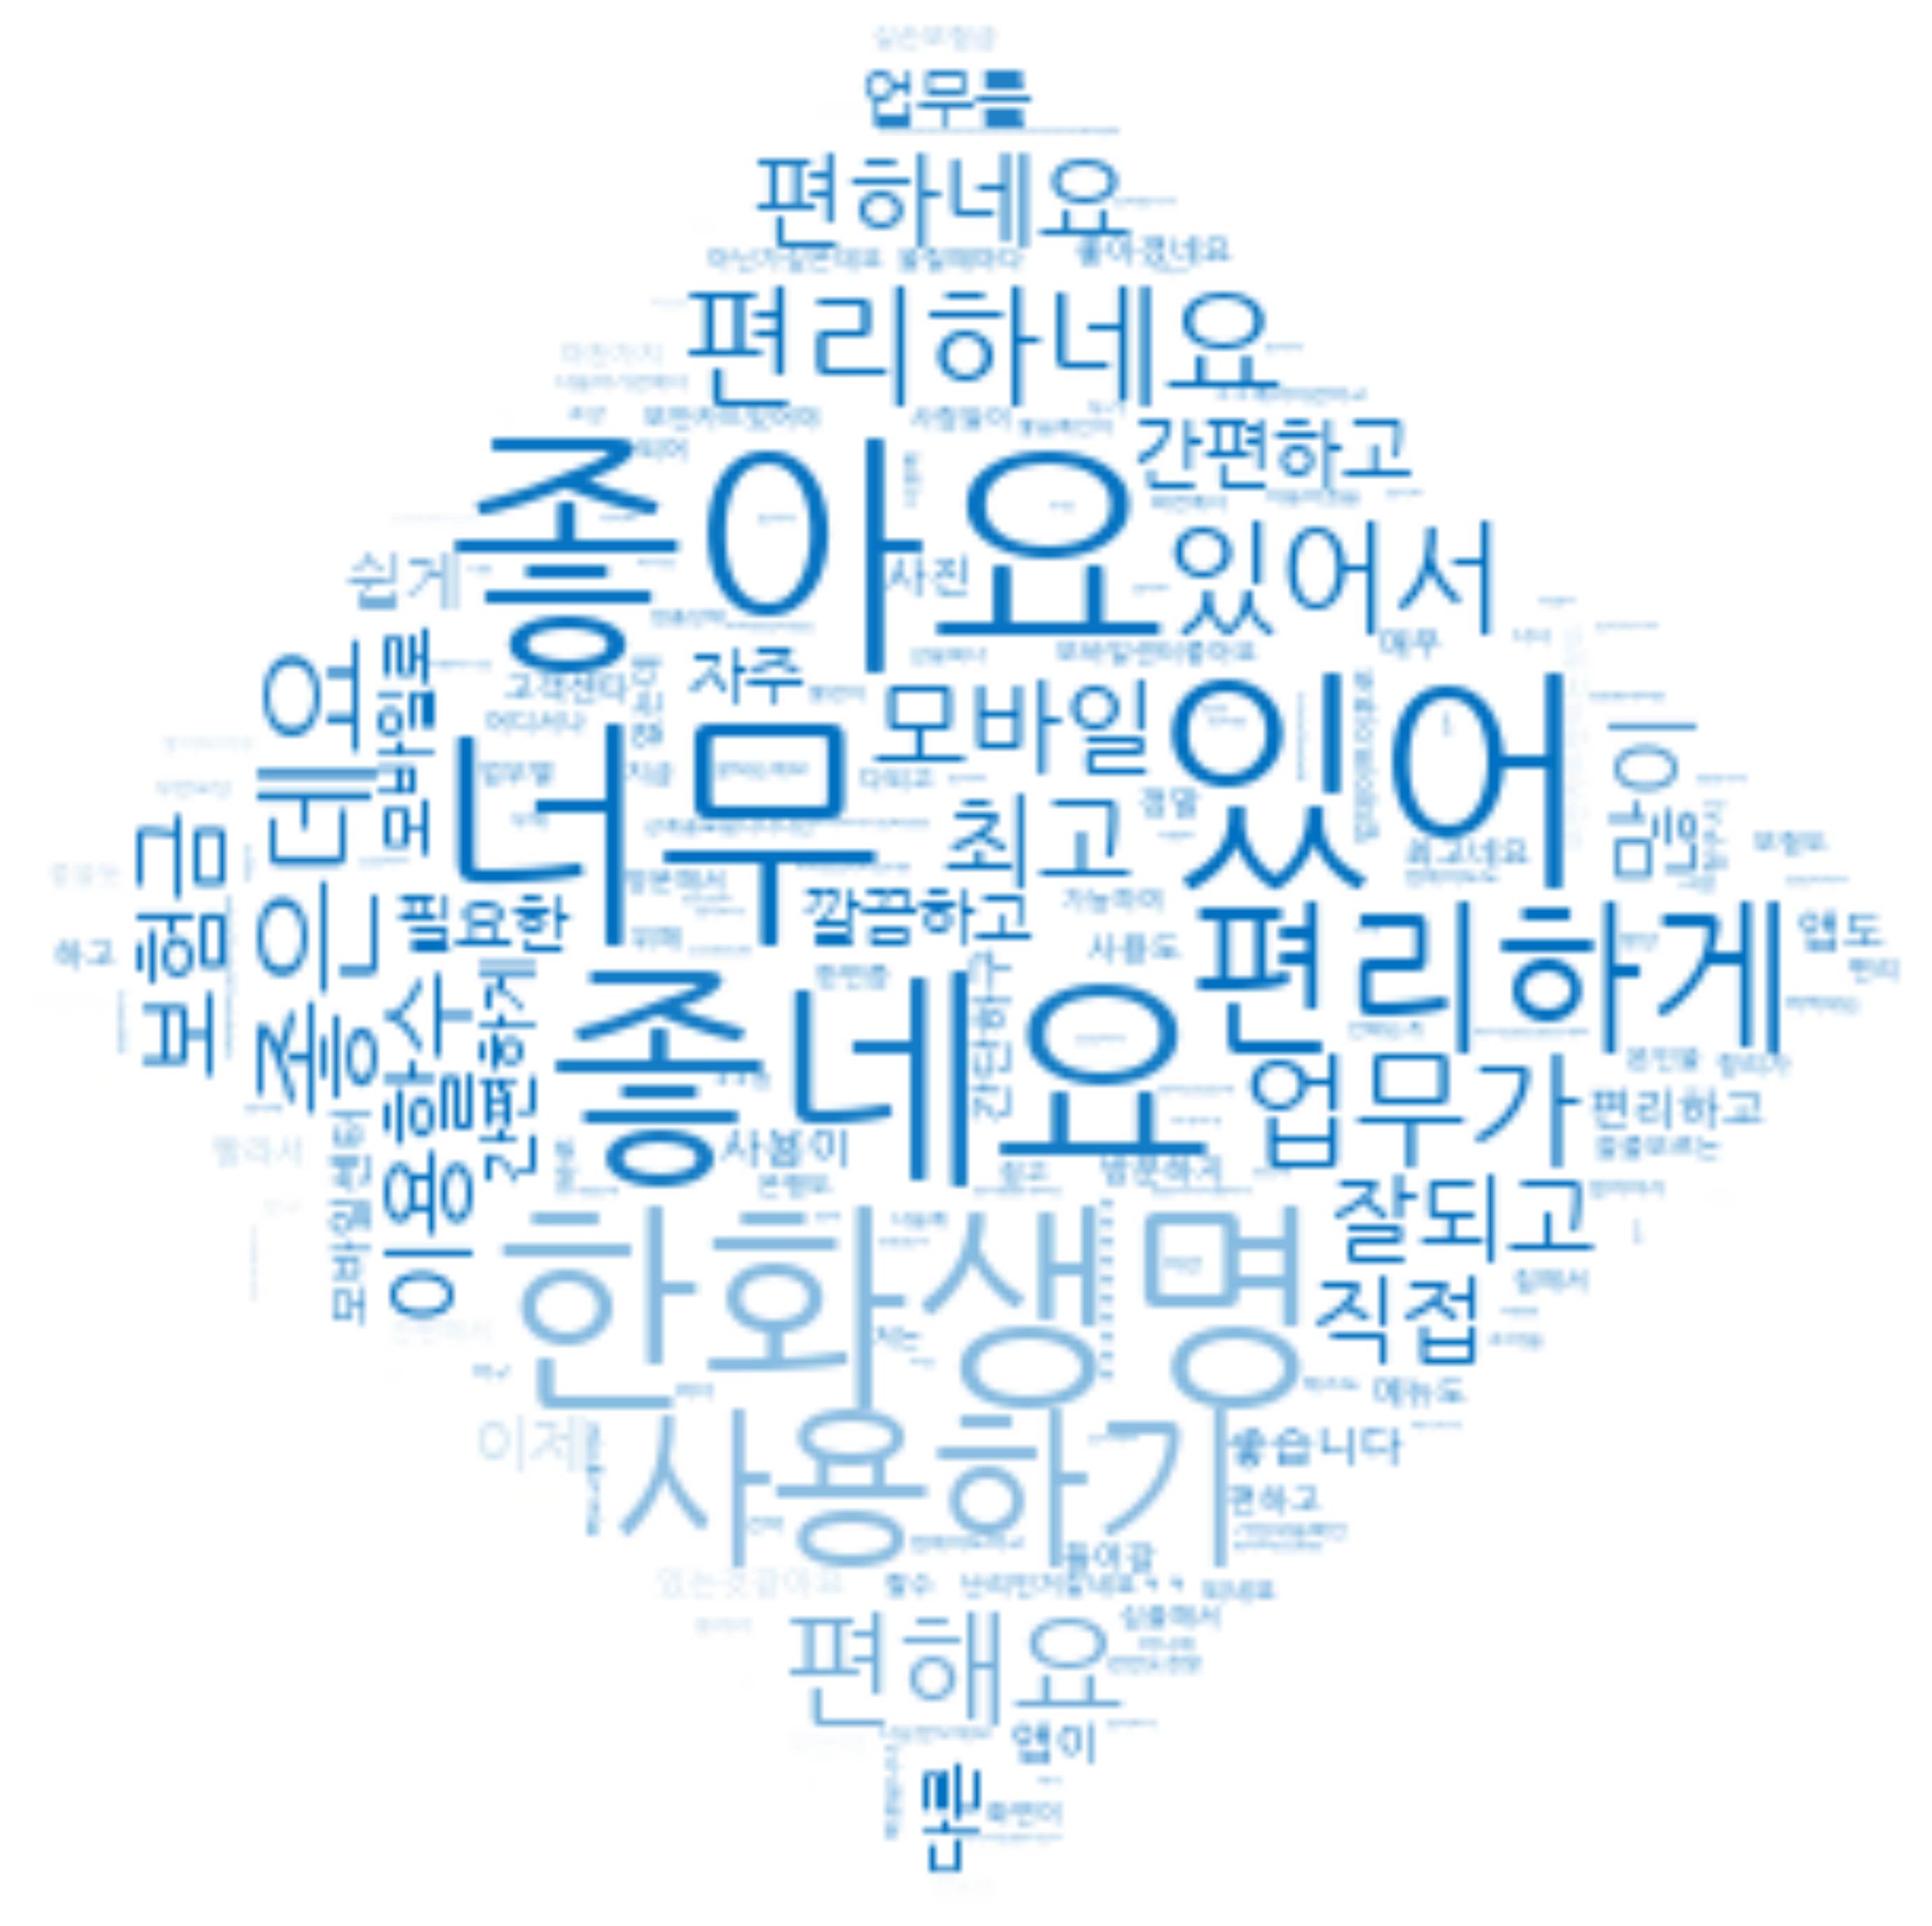

In [13]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image
import numpy as np
color_pos = np.array(Image.open("blue.jpg"))
image_colors = ImageColorGenerator(color_pos)

wordcloud = WordCloud(font_path =r"C:\Windows\Fonts\NanumGothic.ttf",
                     relative_scaling = 0.2, background_color = 'white',
                      mask = color_pos,
                     min_font_size=1,max_font_size=40).generate(both[0])
plt.figure(figsize=(50,50))
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis("off")
plt.show()

Topic Modeling - Negative
=============

In [14]:
lda = LatentDirichletAllocation(n_topics=3, learning_method="batch", max_iter=10, random_state=0)
document_topics = lda.fit_transform(tf_neg)
sorting = np.argsort(lda.components_,axis=1)[:,::-1]
feature_names = np.array(count_vect.get_feature_names())
mglearn.tools.print_topics(topics=range(3),feature_names=feature_names,sorting=sorting, 
                           topics_per_chunk=5,n_words=20)

topic 0       topic 1       topic 2       
--------      --------      --------      
오류            접속            업데이트          
업댓            실행            하라            
에러            최악            화면            
저금            짜증            다시            
일류            로딩            언제            
복구            어플            삭제            
아게뭡           계속            설치            
청구            무한            사용            
보험금           자체            로딩            
한화            너무            구성            
작렬            하나            가요            
이내            로그인           어플            
그냥            하자            연결            
통신            따위            구성만           
콜센터           확인            진짜            
달라            업무            짜증            
때문            부팅            쓰레기           
갑자기           먹통            계속            
라면            해먹            관리            
발생            관리            지연            




WordCloud - Negative
=============

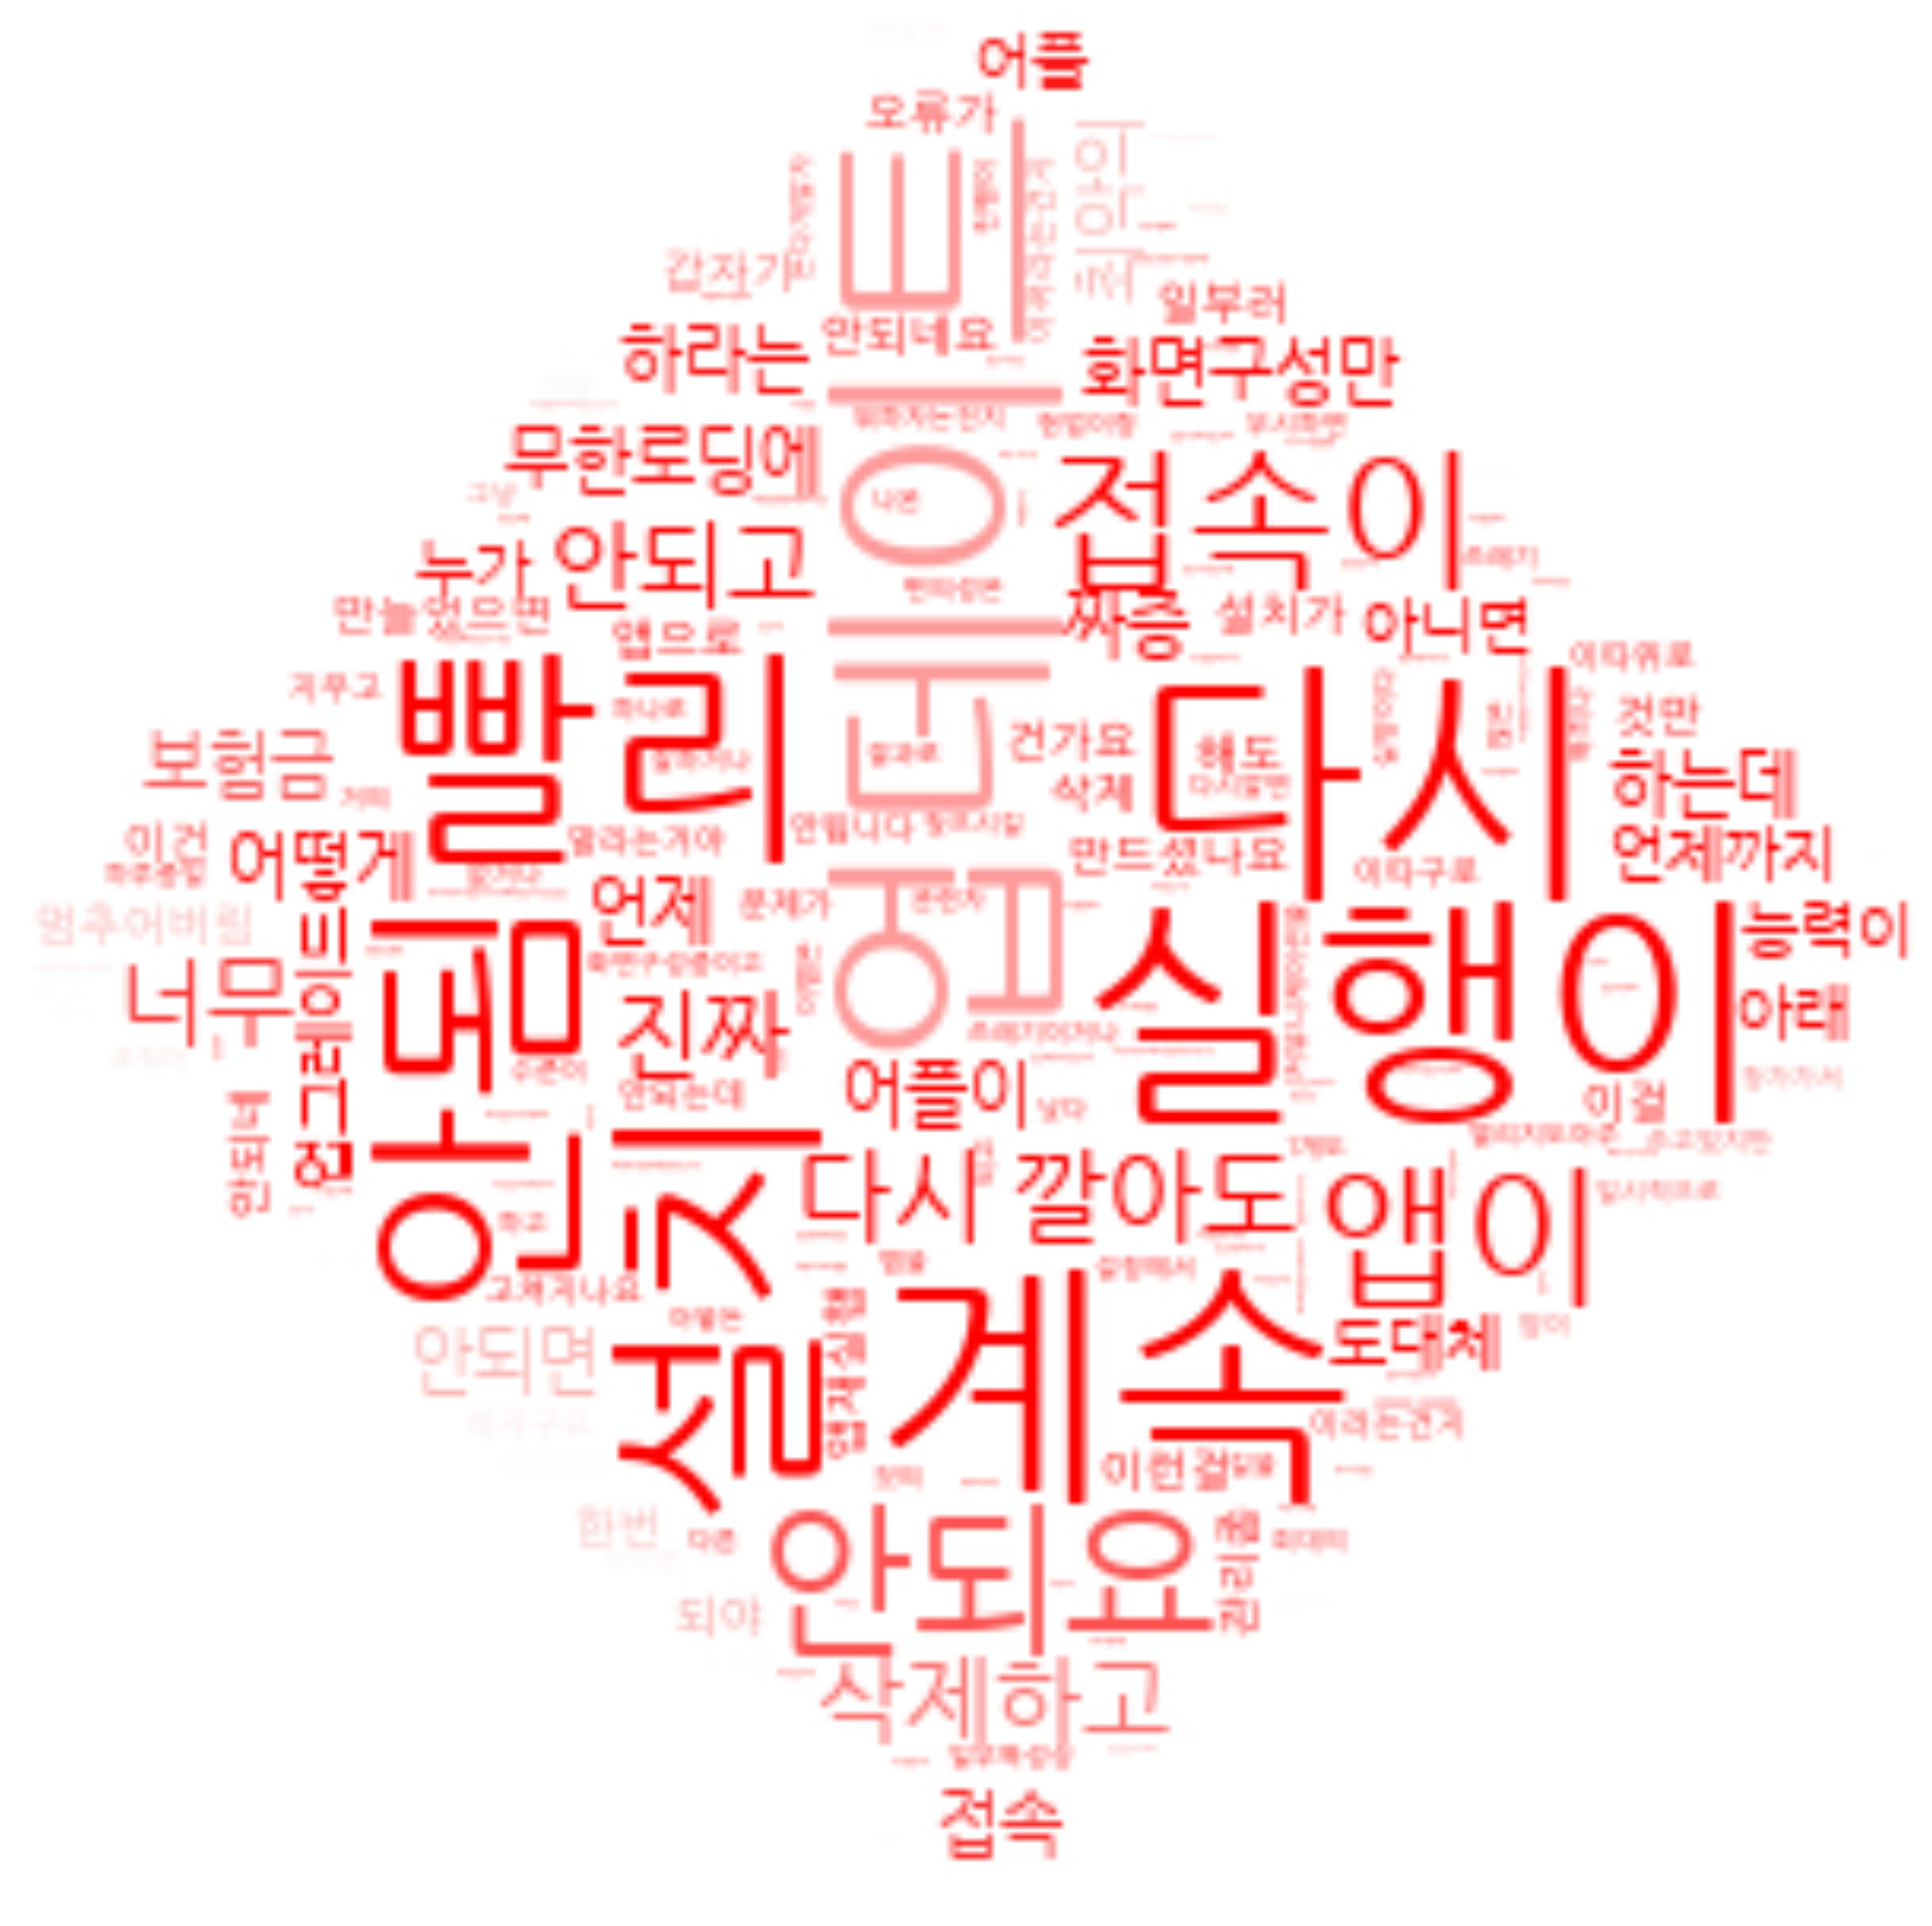

In [15]:
color_neg = np.array(Image.open("red.jpg"))
image_colors = ImageColorGenerator(color_neg)

wordcloud = WordCloud(font_path =r"C:\Windows\Fonts\NanumGothic.ttf",
                     relative_scaling = 0.2, background_color = 'white',
                      mask = color_neg,
                     min_font_size=1,max_font_size=40).generate(both[1])
plt.figure(figsize=(50,50))
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
data_pandas.sort_values(by=('point'), ascending=False)

,contents,point,predict_label,real_label
106,좋아요!!^^,100.0,1,1
193,한화생명 앱 최고 사용하기 간편해서 좋음,100.0,1,1
184,좋아요~ 집에서 보험금 접수하니 넘 편하네요~,100.0,1,1
127,편리해요. 여름철 안전까지 생각해 주는 한화생명 모바일센터앱은 정말 최고네요. 직접...,100.0,1,1
121,좋아요 굿,100.0,1,1
100,편하고 빠르고좋아요~~,99.0,1,1
198,너무 좋은앱이네요 사용이 편리! 최고!,99.0,1,1
197,한화생명 모바일 앱 너무 편해요‥ 짱! 좋아요~,99.0,1,1
195,깔끔하네요 메뉴구성도 좋고 편리합니다,99.0,1,1
165,짱 편해요 앱접근성 및 신속함이 최고네요,99.0,1,1


In [17]:
data_pandas.sort_values(by=('point'), ascending=True)

,contents,point,predict_label,real_label
27,이건 별 하나도 아깝네,-100.0,0,0
35,밑에분처럼 업데이트하라고나오고 하는건없고 앱실행안되고 다시깔아도 똑같고 최악입니다,-100.0,0,0
85,최악 업데이트후 계속로딩. 화면터치 안됨,-100.0,0,0
38,최악임 켜지지도않음..,-100.0,0,0
98,뭐하자는건지... 실행이 안되면 어쩌라는건지. . .,-100.0,0,0
44,무한로딩걸립니다 노트5인데 업데이트전에는 잘되던데 업데이트후에는 무한로딩임 잘되는걸...,-100.0,0,0
52,최악입니다 좀대다가왜접속자체가안되는건지답답해죽겠습니다미치겠네,-100.0,0,0
53,접속이 아예안된다 무슨 서비스를 이따위로 하나 최악의 끝판왕 이구만 ~~,-100.0,0,0
14,화면구성이 안되고 웬종일 돌기만 함...해도 해도 너무하네,-100.0,0,0
22,진짜 최악이네... 캐시...데이터삭제후 다시 깔아도 안되네...관리좀 합시다,-99.0,0,0


## 20170726 made by Taeju Lee